In [ ]:
# komoran 사용하기 위해서 꼭 설치해야 됨!
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="C:\Program Files\Java\jdk-20"

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main Sources [2,180 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:12 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main amd64 Packages [1,119 kB]
Get:13 http://s

In [ ]:
from collections import Counter
from konlpy.tag import Komoran
import pickle
import pandas as pd
import re
from datetime import datetime, timedelta
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pickle_file_path = '/content/drive/MyDrive/Colab Notebooks/미래에셋 빅데이터 페스티벌/네이버종토_감성.pickle'

# pickle 파일을 불러오기
with open(pickle_file_path, 'rb') as pickle_file:
    loaded_data = pickle.load(pickle_file)

# 데이터프레임으로 변환
df = pd.DataFrame(loaded_data)

In [ ]:
selected_columns = ['날짜', '제목', '내용', '종목코드', '기업', '감성분석']
df = df[selected_columns]
df

,날짜,제목,내용,종목코드,기업,감성분석
0,2023-08-29,상폐가 답,상동,60310,3S,"[{'label': 'neutral', 'score': 0.9981939196586..."
1,2023-08-29,잡소리 하는넘들 많네,잡소리 그만들 하시고 아니다 싶으면 떠나면 그만인것을 뭔 개 소리들이 그리 많은지,60310,3S,"[{'label': 'neutral', 'score': 0.9981387853622..."
2,2023-08-28,상폐만,바라보는 종목인듯 조만간 정리매매 예상됨 조심하세요 한 순간에 지하실 구경할 수도...,60310,3S,"[{'label': 'neutral', 'score': 0.9998967647552..."
3,2023-08-28,#실적 좋고...대주주 지분 낮고...M&A 기대를..,실적은 좋게 전망되는데대주주 지분이 도 안되고 이건 뭐누군가 더도말고 지분...,60310,3S,"[{'label': 'neutral', 'score': 0.9997081160545..."
13,2023-08-30,헝셩그룹,매집완료 슈팅임박 세력평단 시총이 깡패,95570,AJ네트웍스,"[{'label': 'neutral', 'score': 0.9968417882919..."
...,...,...,...,...,...,...
330484,2023-08-28,"벼락부자될 희림, 공돈 300억~!! 생길지도 몰라~",오늘 건설 영업정지개월 기사를 악재소멸이라며 주가 띄우던데 희림은 손해배상 명목...,37440,희림,"[{'label': 'negative', 'score': 0.999623060226..."
330485,2023-08-28,토론글도 없네,하나 정보 준다,37440,희림,"[{'label': 'neutral', 'score': 0.9642968177795..."
330486,2023-08-28,이제 떳다하면 상한가다!,희림 화이팅,37440,희림,"[{'label': 'neutral', 'score': 0.8635363578796..."
330487,2023-08-28,일부러 쭉뻬고놓 다시 시작.,악재도 아닌걸로 큰 악재인양 쭉 빼놓고저점에 매집해서 다시 한탕해먹으려고,37440,희림,"[{'label': 'neutral', 'score': 0.7442631721496..."


In [ ]:
# '감성분석' 열의 각 요소에서 'label' 키의 값을 추출하는 함수 정의
def extract_label(row):
    labels = []
    scores = []
    for item in row:
        try:
            label = item['label']
            score = item['score']
            return label, score
        except KeyError:
            pass
    return labels, scores if labels else (None, None)

# '감성분석' 열의 각 요소에 대해 함수를 적용하여 '감성분석_label' 및 '감성분석_score' 열에 추가
df['감성분석_label'], df['감성분석_score'] = zip(*df['감성분석'].apply(extract_label))

# '감성분석' 열 제거
df = df.drop(columns = ['감성분석'])

# # '감성분석_label' 열 값이 'neutral'인 행 제거
# df = df[df['감성분석_label'] != 'neutral']

In [ ]:
# 제목과 내용 합치기
df['제목'] = df['제목'].astype(str)
df['내용'] = df['내용'].astype(str)
df['제목_내용'] = df['제목'] + ' ' + df['내용']
df.head()

,날짜,제목,내용,종목코드,기업,감성분석_label,감성분석_score,제목_내용
0,2023-08-29,상폐가 답,상동,60310,3S,neutral,0.998194,상폐가 답 상동
1,2023-08-29,잡소리 하는넘들 많네,잡소리 그만들 하시고 아니다 싶으면 떠나면 그만인것을 뭔 개 소리들이 그리 많은지,60310,3S,neutral,0.998139,잡소리 하는넘들 많네 잡소리 그만들 하시고 아니다 싶으면 떠나면 그만인것을 뭔 개 ...
2,2023-08-28,상폐만,바라보는 종목인듯 조만간 정리매매 예상됨 조심하세요 한 순간에 지하실 구경할 수도...,60310,3S,neutral,0.999897,상폐만 바라보는 종목인듯 조만간 정리매매 예상됨 조심하세요 한 순간에 지하실 구경...
3,2023-08-28,#실적 좋고...대주주 지분 낮고...M&A 기대를..,실적은 좋게 전망되는데대주주 지분이 도 안되고 이건 뭐누군가 더도말고 지분...,60310,3S,neutral,0.999708,#실적 좋고...대주주 지분 낮고...M&A 기대를.. 실적은 좋게 전망되는데대...
13,2023-08-30,헝셩그룹,매집완료 슈팅임박 세력평단 시총이 깡패,95570,AJ네트웍스,neutral,0.996842,헝셩그룹 매집완료 슈팅임박 세력평단 시총이 깡패


In [ ]:
def before_kmr(df, content_col):
    temp_list = df[content_col].tolist()
    for i in range(len(temp_list)):
        # 정규식을 사용하여 연속된 공백을 한 개로 대체
        temp_list[i] = re.sub(r'\s+', ' ', temp_list[i])

        # 특수문자 제거
        pattern = re.compile(r'[^ A-Za-z0-9가-힣+]')
        temp_list[i] = pattern.sub('', temp_list[i])

    return temp_list

In [ ]:
df['제목_내용'] = before_kmr(df, '제목_내용')
df

,날짜,제목,내용,종목코드,기업,감성분석_label,감성분석_score,제목_내용
0,2023-08-29,상폐가 답,상동,60310,3S,neutral,0.998194,상폐가 답 상동
1,2023-08-29,잡소리 하는넘들 많네,잡소리 그만들 하시고 아니다 싶으면 떠나면 그만인것을 뭔 개 소리들이 그리 많은지,60310,3S,neutral,0.998139,잡소리 하는넘들 많네 잡소리 그만들 하시고 아니다 싶으면 떠나면 그만인것을 뭔 개 ...
2,2023-08-28,상폐만,바라보는 종목인듯 조만간 정리매매 예상됨 조심하세요 한 순간에 지하실 구경할 수도...,60310,3S,neutral,0.999897,상폐만 바라보는 종목인듯 조만간 정리매매 예상됨 조심하세요 한 순간에 지하실 구경할...
3,2023-08-28,#실적 좋고...대주주 지분 낮고...M&A 기대를..,실적은 좋게 전망되는데대주주 지분이 도 안되고 이건 뭐누군가 더도말고 지분...,60310,3S,neutral,0.999708,실적 좋고대주주 지분 낮고MA 기대를 실적은 좋게 전망되는데대주주 지분이 도 안되고...
13,2023-08-30,헝셩그룹,매집완료 슈팅임박 세력평단 시총이 깡패,95570,AJ네트웍스,neutral,0.996842,헝셩그룹 매집완료 슈팅임박 세력평단 시총이 깡패
...,...,...,...,...,...,...,...,...
330484,2023-08-28,"벼락부자될 희림, 공돈 300억~!! 생길지도 몰라~",오늘 건설 영업정지개월 기사를 악재소멸이라며 주가 띄우던데 희림은 손해배상 명목...,37440,희림,negative,0.999623,벼락부자될 희림 공돈 300억 생길지도 몰라 오늘 건설 영업정지개월 기사를 악재소멸...
330485,2023-08-28,토론글도 없네,하나 정보 준다,37440,희림,neutral,0.964297,토론글도 없네 하나 정보 준다
330486,2023-08-28,이제 떳다하면 상한가다!,희림 화이팅,37440,희림,neutral,0.863536,이제 떳다하면 상한가다 희림 화이팅
330487,2023-08-28,일부러 쭉뻬고놓 다시 시작.,악재도 아닌걸로 큰 악재인양 쭉 빼놓고저점에 매집해서 다시 한탕해먹으려고,37440,희림,neutral,0.744263,일부러 쭉뻬고놓 다시 시작 악재도 아닌걸로 큰 악재인양 쭉 빼놓고저점에 매집해서 다...


In [ ]:
# 추가적으로 공백만 있는 행 삭제
df = df[df['제목_내용'].str.strip() != '']

### Komoran 활용해보기

In [ ]:
komoran = Komoran()

In [ ]:
# komoran으로 명사 추출하기
def extract_nouns_komoran(text):
    nouns = komoran.nouns(text)
    return nouns

df['명사_komoran'] = df['제목_내용'].apply(extract_nouns_komoran)

<ipython-input-12-3b13b15028e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['명사_komoran'] = df['제목_내용'].apply(extract_nouns_komoran)


In [ ]:
df

,날짜,제목,내용,종목코드,기업,감성분석_label,감성분석_score,제목_내용,명사_komoran
0,2023-08-29,상폐가 답,상동,60310,3S,neutral,0.998194,상폐가 답 상동,"[상, 폐가, 답, 상동]"
1,2023-08-29,잡소리 하는넘들 많네,잡소리 그만들 하시고 아니다 싶으면 떠나면 그만인것을 뭔 개 소리들이 그리 많은지,60310,3S,neutral,0.998139,잡소리 하는넘들 많네 잡소리 그만들 하시고 아니다 싶으면 떠나면 그만인것을 뭔 개 ...,"[잡소리, 넘, 잡소리, 만인, 것, 개, 소리]"
2,2023-08-28,상폐만,바라보는 종목인듯 조만간 정리매매 예상됨 조심하세요 한 순간에 지하실 구경할 수도...,60310,3S,neutral,0.999897,상폐만 바라보는 종목인듯 조만간 정리매매 예상됨 조심하세요 한 순간에 지하실 구경할...,"[상, 폐, 종목, 정리, 매매, 예상, 조심, 순간, 지하실, 구경, 수]"
3,2023-08-28,#실적 좋고...대주주 지분 낮고...M&A 기대를..,실적은 좋게 전망되는데대주주 지분이 도 안되고 이건 뭐누군가 더도말고 지분...,60310,3S,neutral,0.999708,실적 좋고대주주 지분 낮고MA 기대를 실적은 좋게 전망되는데대주주 지분이 도 안되고...,"[실적, 대, 주주, 지분, 기대, 실적, 전망, 데, 대주주, 지분, 도, 안, ..."
13,2023-08-30,헝셩그룹,매집완료 슈팅임박 세력평단 시총이 깡패,95570,AJ네트웍스,neutral,0.996842,헝셩그룹 매집완료 슈팅임박 세력평단 시총이 깡패,"[매, 집, 완료, 슈팅, 임박, 세력, 평단, 시, 총, 깡패]"
...,...,...,...,...,...,...,...,...,...
330484,2023-08-28,"벼락부자될 희림, 공돈 300억~!! 생길지도 몰라~",오늘 건설 영업정지개월 기사를 악재소멸이라며 주가 띄우던데 희림은 손해배상 명목...,37440,희림,negative,0.999623,벼락부자될 희림 공돈 300억 생길지도 몰라 오늘 건설 영업정지개월 기사를 악재소멸...,"[벼락부자, 공돈, 오늘, 건설, 영업정지, 개월, 기사, 악재, 소멸, 주가, 손..."
330485,2023-08-28,토론글도 없네,하나 정보 준다,37440,희림,neutral,0.964297,토론글도 없네 하나 정보 준다,"[토론, 글, 정보]"
330486,2023-08-28,이제 떳다하면 상한가다!,희림 화이팅,37440,희림,neutral,0.863536,이제 떳다하면 상한가다 희림 화이팅,"[상한가, 화이팅]"
330487,2023-08-28,일부러 쭉뻬고놓 다시 시작.,악재도 아닌걸로 큰 악재인양 쭉 빼놓고저점에 매집해서 다시 한탕해먹으려고,37440,희림,neutral,0.744263,일부러 쭉뻬고놓 다시 시작 악재도 아닌걸로 큰 악재인양 쭉 빼놓고저점에 매집해서 다...,"[뻬, 시작, 악재, 것, 악재, 양, 점, 매, 집, 한탕]"


In [ ]:
# 단어 빈도 분석
from collections import Counter

# 레이블에 따라 데이터프레임 분리
word_frq_by_label = {}
for label in df['감성분석_label'].unique():
    label_data = df[df['감성분석_label'] == label]

    all_nouns = [noun for nouns_list in label_data['명사_komoran'] for noun in nouns_list]
    noun_frequencies = Counter(all_nouns)

    word_df = pd.DataFrame({'단어': list(noun_frequencies.keys()), '빈도수': list(noun_frequencies.values())})

    # 빈도수로 정렬
    word_frq_df = word_df.sort_values(by='빈도수', ascending=False)

    # 한 글자인 단어 제외
    word_frq_df = word_frq_df[word_frq_df['단어'].apply(lambda x: len(x) > 1)]

    # 상위 100개 단어 추출(수정 가능 < 50)
    top_50_words = word_frq_df.head(50)

    word_frq_by_label[label] = top_50_words

### 워드 클라우드 생성

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 워드 클라우드 모양 이미지 불러오기
im2 = Image.open('/content/drive/MyDrive/Colab Notebooks/미래에셋 빅데이터 페스티벌/cloud.png')
mask_arr = np.array(im2)

(-0.5, 2667.5, 1889.5, -0.5)

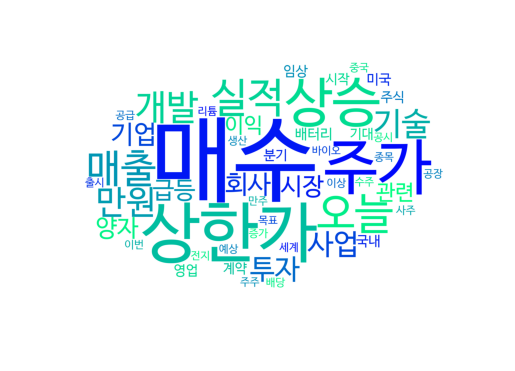

In [ ]:
# positive 시각화
wc = WordCloud(font_path='NanumBarunGothic', width=400, height=400, scale=2.0, max_font_size=250, mask = mask_arr, background_color = 'white', colormap = 'winter', prefer_horizontal = True)
word_frq_dict = dict(zip(word_frq_by_label['positive']['단어'], word_frq_by_label['positive']['빈도수']))
gen = wc.generate_from_frequencies(word_frq_dict)
plt.figure()
plt.imshow(gen)
plt.axis('off')

(-0.5, 2667.5, 1889.5, -0.5)

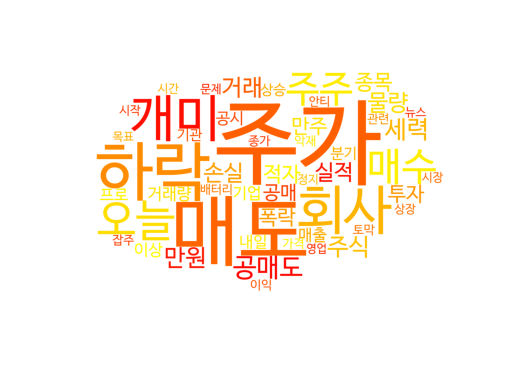

In [ ]:
# negative 시각화
mask_arr = np.array(im2)
wc = WordCloud(font_path='NanumBarunGothic', width=400, height=400, scale=2.0, max_font_size=250, mask = mask_arr, background_color = 'white', colormap = 'autumn', prefer_horizontal = True)
word_frq_dict = dict(zip(word_frq_by_label['negative']['단어'], word_frq_by_label['negative']['빈도수']))
gen = wc.generate_from_frequencies(word_frq_dict)
plt.figure()
plt.imshow(gen)
plt.axis('off')

(-0.5, 2667.5, 1889.5, -0.5)

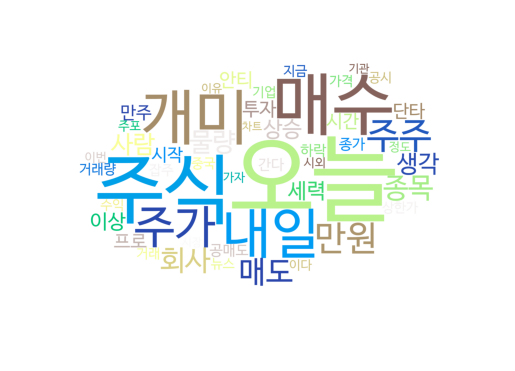

In [ ]:
# neutral 시각화
wc = WordCloud(font_path='NanumBarunGothic', width=400, height=400, scale=2.0, max_font_size=250, mask = mask_arr, background_color = 'white', colormap = 'terrain', prefer_horizontal = True)
word_frq_dict = dict(zip(word_frq_by_label['neutral']['단어'], word_frq_by_label['neutral']['빈도수']))
gen = wc.generate_from_frequencies(word_frq_dict)
plt.figure()
plt.imshow(gen)
plt.axis('off')